<a href="https://colab.research.google.com/github/duonghiepit/sea-level-predictor/blob/main/sea_level_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
def draw_plot():
  df = pd.read_csv('/content/epa-sea-level.csv')

  fig, ax = plt.subplots(figsize=(16,9))
  plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

  result = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
  start_year = df['Year'].min()
  end_year = 2050
  best_fit_data = {
      'Year': [],
      'y_value': []
  }

  for year in range(start_year, end_year):
    best_fit_data['Year'] = [year for year in range(start_year, end_year)]
    best_fit_data['y_value'] = [result.slope*year + result.intercept for year in range(start_year, end_year)]

  plt.plot(best_fit_data['Year'], best_fit_data['y_value'], 'r')

  start_year = 2000
  end_year = 2050
  result = linregress(df.loc[df['Year'] >= start_year]['Year'], df.loc[df['Year'] >= start_year]['CSIRO Adjusted Sea Level'])

  for year in range(start_year, end_year):
    best_fit_data['Year'] = [year for year in range(start_year, end_year)]
    best_fit_data['y_value'] = [result.slope*year + result.intercept for year in range(start_year, end_year)]

  plt.plot(best_fit_data['Year'], best_fit_data['y_value'], 'g')

  ax.set_title('Rise in Sea Level')
  ax.set_xlabel('Year')
  ax.set_ylabel('Sea Level (inches)')

  plt.savefig('sea_level_plot.png')
  return plt.gca()

<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

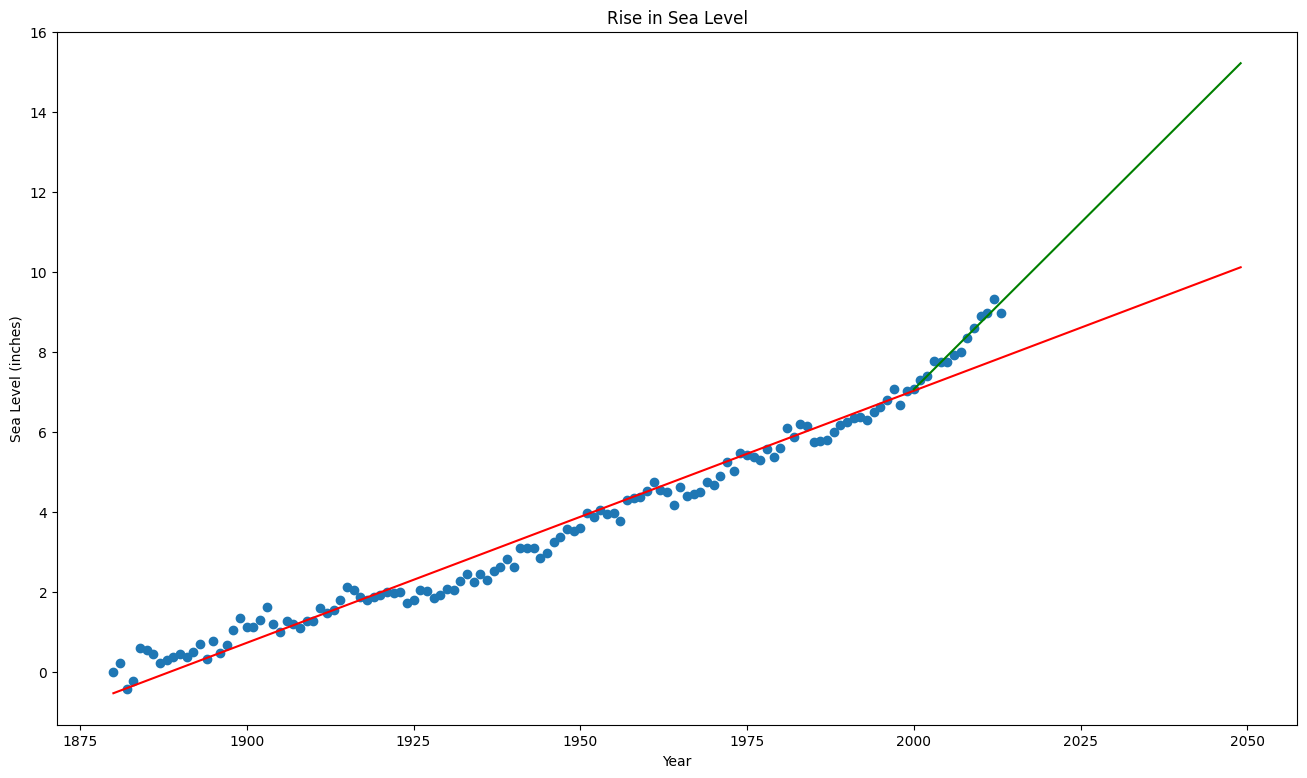

In [4]:
draw_plot()